In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# ***Univariate Analysis***

# ***Understand Dataset and Data Cleaning***

In [141]:
x=pd.read_csv("train.csv")
x

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [142]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [143]:
x['Postal Code']=x['Postal Code'].fillna(0)
x['Postal Code']=x['Postal Code'].astype(int)


In [144]:
x['Order Date']=pd.to_datetime(x['Order Date'])
x['Ship Date']=pd.to_datetime(x['Ship Date'])

<ipython-input-144-5e51f85a98ad>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-144-5e51f85a98ad>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [145]:
x.shape

(9800, 18)

# ***Data Types***

In [146]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

# ***Descriptive Statistics***

In [147]:
x.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# ***Histogram For Numeric Variables (Sales)***

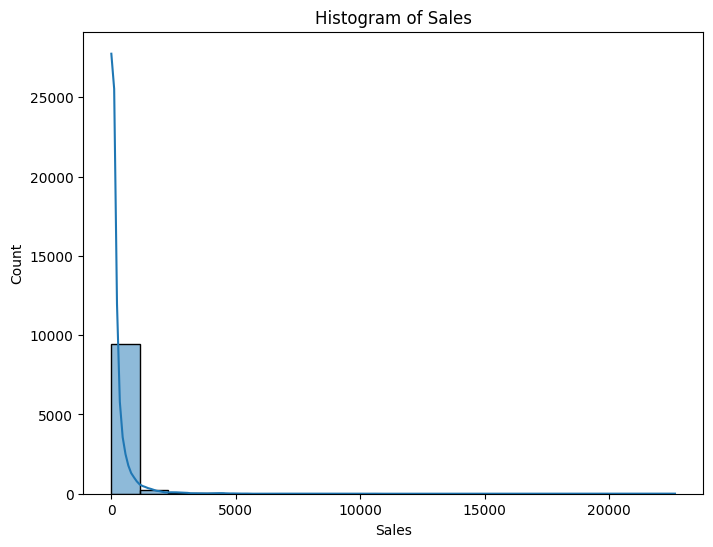

In [148]:
plt.figure(figsize=(8, 6))
sns.histplot(x['Sales'], bins=20, kde=True)
plt.title('Histogram of Sales')
plt.show()

In [156]:
x['Year'] = x['Order Date'].dt.year
x['Month'] = x['Order Date'].dt.month

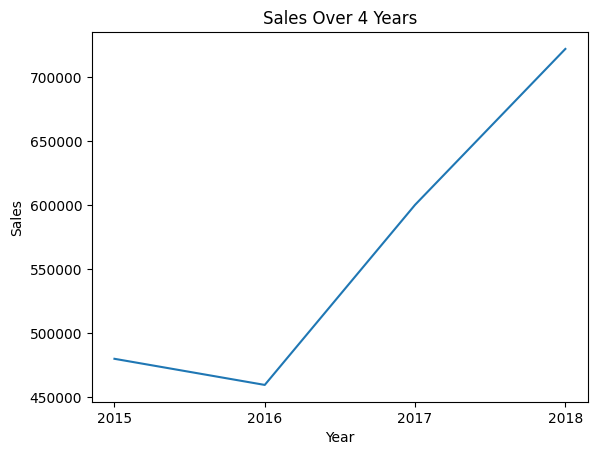

In [150]:
from matplotlib.ticker import MaxNLocator
sales_by_year = x.groupby('Year')['Sales'].sum().reset_index()

plt.plot(sales_by_year['Year'], sales_by_year['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Over 4 Years')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


# ***Seasonal Decomposition***

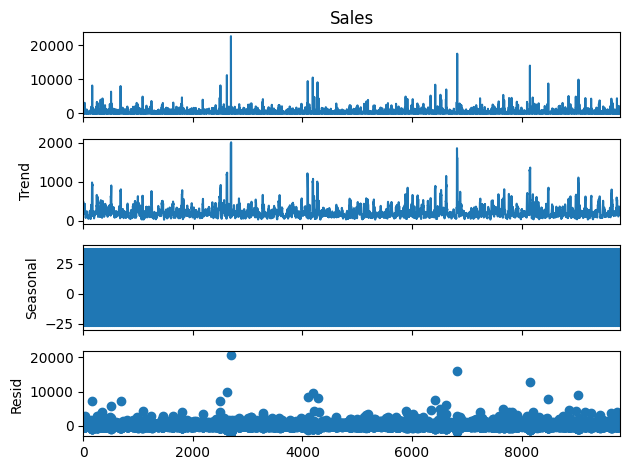

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x['Sales'], model='additive', period=12)
result.plot()
plt.show()


# ***Box Plot for Sales***

In [104]:
boxplot_fig = px.box(x, y='Sales', title='Box Plot of Sales')
boxplot_fig.show()

# ***Sales Distribution by Category***

In [105]:
category_distribution_fig = px.bar(x.head(50), x='Category', y='Sales', title='Sales Distribution by Category')
category_distribution_fig.show()


# ***Sales Variation Over Time (Year wise already plotted above)***

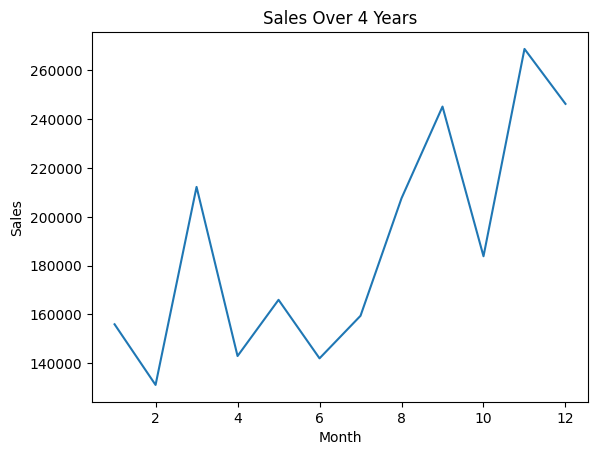

In [155]:
from matplotlib.ticker import MaxNLocator
sales_by_year = x.groupby('Month')['Sales'].sum().reset_index()

plt.plot(sales_by_year['Month'], sales_by_year['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Over 4 Years')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


# ***Bivariate Analysis***

# ***Correlation Analysis***

In [106]:
correlation_matrix = x.corr()
correlation_heatmap_fig = px.imshow(correlation_matrix, title='Correlation Heatmap')
correlation_heatmap_fig.show()

<ipython-input-106-3fd450f885d4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# ***Pair Plot for numeric variables***

In [107]:
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns
fig = px.scatter_matrix(x[numeric_cols], title='Pair Plot of Numeric Variables')
fig.show()

# ***Category wise Sales Trends***
For better visualization i have considered top 50 values

In [158]:
category_trends_fig = px.bar(x.head(50), x='Category', y='Sales', color='Category', title='Category-wise Sales Trends')
category_trends_fig.show()

# ***Region wise Sales Trends***

In [157]:
category_trends_fig = px.bar(x.head(50), x='Region', y='Sales', color='Category', title='Region-wise Sales Trends')
category_trends_fig.show()

In [110]:
scatter_fig = px.scatter(x, x='Segment', y='Sales', title='Scatter Plot: Customer Segment vs Quantity')
scatter_fig.show()

# ***Shipping Mode Vs Sales***

In [159]:
category_trends_fig = px.bar(x.head(50), x='Ship Mode', y='Sales',  title='Shipping Mode vs Sales')
category_trends_fig.show()

# ***Region-wise Product Sales***

In [160]:
fig = px.bar(x.head(50), x="Region", y="Sales",
             color="Region",
             barmode = 'group')

fig.show()

# ***Sales per Product***

In [166]:
fig = px.bar(x.head(50), x="Sales", y="Product Name")
fig.show()

# ***Key Insights***

**Below are some key insights I have gained after analyzing both the analyses above**

***
1. Sales have evolved over time, with the majority of sales occurring in 2018.
1. Furniture accounts for the greatest amount of sales, followed by technology and office supplies.
2. Furniture sales are greater in the South and East Regions, but technology sales are higher in the North and West Regions.
2. The regular shipping option is preferred by the majority of clients over the other two choices.
***
The insights provided above are based on data that I reviewed for analysis across various columns in the whole dataset. For most of the numerical columns, when charting, I selected the top 50 values for more effective visualization.



